In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

In [2]:
import glob

In [3]:
import numpy as np
import os
import glob
import pickle
import math
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from numpy import array, dot, round, cross, ceil
from numpy.linalg import inv, det, norm
from numpy import cross, dot, ceil
from numpy.linalg import norm, inv

In [4]:
from openpyxl import Workbook
from openpyxl.chart import Reference, LineChart
from openpyxl.chart.layout import Layout, ManualLayout
from openpyxl.chart.shapes import GraphicalProperties
from openpyxl.chart.shapes import GraphicalProperties
from openpyxl.drawing.line import LineProperties

In [5]:
def make_excel(ws,name,test_data):
    titles = [["angle","my_model","cnid_sampling"]]
    test_data = titles + test_data

    for i,v in enumerate(test_data):
        ws.append(v)

    rmin = ws.min_row
    rmax = ws.max_row
    cmin = ws.min_column
    cmax = ws.max_column


    chart = LineChart()
    src = Reference(ws, min_col=cmin+1, min_row=rmin, max_col=cmax, max_row=rmax)
    chart.add_data(src, titles_from_data=True)
    cat = Reference(ws, min_col=cmin, min_row=rmin+1, max_row=rmax)  # 項目名の設定
    chart.set_categories(cat)
    chart.title = f"({name})"  # グラフタイトル
    chart.x_axis.title = 'x'  # 軸ラベル
    chart.y_axis.title = 'y'
    chart.anchor = 'A8'  # グラフの表示位置
    chart.width = 13  # グラフのサイズ
    chart.height = 8


    chart.layout = Layout(ManualLayout(x = 0.05, y = 0.05, h = 0.9, w = 0.9, xMode="edge", yMode="edge"))
    #プロットエリアの
    chart.plot_area.spPr = GraphicalProperties(solidFill = "f2ffff", ln =LineProperties(solidFill="000000", w=2*12700))
    chart.plot_area.spPr = GraphicalProperties(noFill = True)

    ws.add_chart(chart)
    wb.save('gbenergy.xlsx')

    # 線の色を変更する
    chart.ser[0].graphicalProperties.line.solidFill = "FF0000"
    chart.ser[1].graphicalProperties.line.solidFill = "00FF00"
    # chart.ser[2].graphicalProperties.line.solidFill = "0000FF"
    wb.save('gbenergy.xlsx')

    # 線種を変更する
    # 設定可能な値：'lgDash', 'sysDash', 'dashDot', 'solid', 'sysDashDot',
    # 'lgDashDotDot', 'dot', 'sysDot', 'sysDashDotDot', 'dash', 'lgDashDot'
    chart.ser[0].graphicalProperties.line.dashStyle = 'solid'
    chart.ser[1].graphicalProperties.line.dashStyle = 'solid'
    # chart.ser[2].graphicalProperties.line.dashStyle = 'solid'
    wb.save('gbenergy.xlsx')

    # 線の太さを変更する
    chart.ser[0].graphicalProperties.line.width = 10000
    chart.ser[1].graphicalProperties.line.width = 10000
    # chart.ser[2].graphicalProperties.line.width = 30000
    wb.save('gbenergy.xlsx')

    # 線を滑らかにする
    chart.ser[0].smooth = False
    wb.save('gbenergy.xlsx')

    # マーカーを変更する
    # 設定可能な値：'x', 'auto', 'picture', 'star', 'diamond', 'plus', 'dot',
    # 'square', 'dash', 'triangle', 'circle'
    chart.ser[0].marker.symbol = 'circle'
    chart.ser[1].marker.symbol = 'diamond'
    # chart.ser[2].marker.symbol = 'diamond'
    wb.save('gbenergy.xlsx')

    chart.ser[0].marker.size = 10
    chart.ser[1].marker.size = 8
    # chart.ser[2].marker.symbol = 'diamond'
    wb.save('gbenergy.xlsx')

    # マーカーの色を変更する
    chart.ser[0].marker.graphicalProperties.line.solidFill = "FF0000"
    chart.ser[1].marker.graphicalProperties.line.solidFill = "00FF00"
    # chart.ser[2].marker.graphicalProperties.line.solidFill = "0000FF"
    wb.save('gbenergy.xlsx')

    # グラフの種類を変更する
    # chart.grouping = 'stacked'  # 積み上げ折れ線グラフ
    # chart.grouping = 'percentStacked'  # 100％積み上げ折れ線グラフ
    chart.grouping = 'standard'  # 折れ線グラフ
    wb.save('gbenergy.xlsx')

In [6]:
def get_energy(filename):
    n_layer,dx,energy = np.loadtxt(filename,unpack=True)
    min_energy = energy.min()
    return min_energy

In [7]:
def get_cnid_energy(filename):
    a,b,dx,dy,dz,energy,deltax = np.loadtxt(filename,unpack=True)
    min_energy = energy.min()
    return min_energy

In [8]:
def order_indice(test):
    test = np.array(test)
    test = np.sort(test)
    x, y, z = test
    if x!=y:
        test = np.array([z,y,x])
    else:
        pass
    return test

In [9]:
def get_100_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
        mis_angle = 2*(np.arctan(tang)/np.pi*180)
        gbe = get_energy(f"{filename}/results")
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([90,0])])
    return result_sorted

In [10]:
def get_100_cnid_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
        mis_angle = 2*(np.arctan(tang)/np.pi*180)
        gbe = get_cnid_energy(f"{filename}/results")
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([90,0])])
    return result_sorted

In [11]:
def get_110_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        gbname = order_indice(gbname)
        x, y, z = gbname
        tang = z/np.sqrt(x**2 + y**2)
        mis_angle = 2*(np.arctan(tang)/np.pi*180)
        mis_angle = abs(mis_angle)
        gbe = get_energy(f"{filename}/results")   
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([180,0])])
    return result_sorted

In [12]:
def get_110_cnid_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        gbname = order_indice(gbname)
        x, y, z = gbname
        tang = z/np.sqrt(x**2 + y**2)
        mis_angle = 2*(np.arctan(tang)/np.pi*180)
        mis_angle = abs(mis_angle)
        gbe = get_cnid_energy(f"{filename}/results")
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([180,0])])
    return result_sorted

In [13]:
def get_111_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    baselist = []
    for i in list(itertools.permutations([1,-1,0])):
        baselist.append(list(i))
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        gbname = [-gbname[0],gbname[1],gbname[2]]
        misorientation_list = []
        for base in baselist:
            cos = dot(gbname,base)/(norm(gbname)*norm(base))
            mis_orientation = 2*(np.arccos(cos)/np.pi*180)
            mis_orientation =  abs(mis_orientation)
            misorientation_list.append(mis_orientation)
        mis_angle = min(misorientation_list)
        gbe = get_energy(f"{filename}/results") 
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    return result_sorted

In [14]:
def get_111_cnid_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    baselist = []
    for i in list(itertools.permutations([1,-1,0])):
        baselist.append(list(i))
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        gbname = [-gbname[0],gbname[1],gbname[2]]
        misorientation_list = []
        for base in baselist:
            cos = dot(gbname,base)/(norm(gbname)*norm(base))
            mis_orientation = 2*(np.arccos(cos)/np.pi*180)
            mis_orientation =  abs(mis_orientation)
            misorientation_list.append(mis_orientation)
        mis_angle = min(misorientation_list)
        gbe = get_cnid_energy(f"{filename}/results")
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    return result_sorted

In [102]:
for dirname in glob.glob("results/*"):
    print(dirname)
    dirname = dirname.split("/")[-1]
    print(dirname)
    axis = "".join(list(dirname)[-3:])
    print(axis)

results/Ag100
Ag100
100
results/Ag110
Ag110
110
results/Ag111
Ag111
111
results/Al100
Al100
100
results/Al110
Al110
110
results/Al111
Al111
111
results/Au100
Au100
100
results/Au110
Au110
110
results/Au111
Au111
111
results/Cu100
Cu100
100
results/Cu110
Cu110
110
results/Cu111
Cu111
111
results/Fe100
Fe100
100
results/Fe110
Fe110
110
results/Fe111
Fe111
111
results/Mo100
Mo100
100
results/Mo110
Mo110
110
results/Mo111
Mo111
111
results/Nb100
Nb100
100
results/Nb110
Nb110
110
results/Nb111
Nb111
111
results/Ni100
Ni100
100
results/Ni110
Ni110
110
results/Ni111
Ni111
111
results/Pb100
Pb100
100
results/Pb110
Pb110
110
results/Pb111
Pb111
111
results/Pd100
Pd100
100
results/Pd110
Pd110
110
results/Pd111
Pd111
111
results/Pt100
Pt100
100
results/Pt110
Pt110
110
results/Pt111
Pt111
111
results/Ta100
Ta100
100
results/Ta110
Ta110
110
results/Ta111
Ta111
111
results/V100
V100
100
results/V110
V110
110
results/V111
V111
111
results/W100
W100
100
results/W110
W110
110
results/W111
W111
111


In [21]:
for dirname in glob.glob("results/*"):
    name = dirname.split("/")[-1]
    name_dash = name.split("_")[0]
    axis = "".join(list(name_dash)[-3:])
    print(dirname)
    print(f"results2/{name}")
    print(name)
    print(axis)

results/Ag100
results2/Ag100
Ag100
100
results/Al100
results2/Al100
Al100
100


In [38]:
get_100_cnid_gbenegy

<function __main__.get_100_cnid_gbenegy(dirname)>

In [55]:
np.hstack((result_sorted,result_sorted_cnid[:,1].reshape(-1,1)))

array([[  0.     ,   0.     ,   0.     ],
       [  8.79741, 452.11455, 452.12141],
       [ 10.38886, 491.59223, 491.60882],
       [ 12.68038, 538.95761, 539.01343],
       [ 14.25003, 566.23156, 566.23755],
       [ 16.2602 , 596.50502, 596.60499],
       [ 18.92464, 622.17899, 622.22225],
       [ 22.61986, 641.27933, 641.52768],
       [ 25.98923, 658.06025, 658.35008],
       [ 28.07249, 645.71238, 645.78039],
       [ 31.89079, 652.97177, 653.04041],
       [ 36.8699 , 607.80502, 608.06671],
       [ 41.11209, 661.73279, 661.86385],
       [ 42.07502, 667.74593, 667.98962],
       [ 43.60282, 667.6759 , 667.89431],
       [ 46.39718, 677.44604, 677.75206],
       [ 47.92498, 677.53692, 677.70981],
       [ 48.88791, 674.90464, 675.22356],
       [ 53.1301 , 612.35873, 612.35878],
       [ 58.10921, 632.56591, 632.60988],
       [ 61.92751, 599.9158 , 598.64267],
       [ 64.01077, 590.97047, 591.1552 ],
       [ 67.38014, 548.83625, 548.83878],
       [ 71.07536, 525.61865, 525.

In [21]:
os.getcwd()

'/homenfs1/yhata/calc/220506'

In [24]:
glob.glob("results/*")

['results/Ag100',
 'results/Al100',
 'results/Au100',
 'results/Cu110',
 'results/Ni100',
 'results/Pb100',
 'results/Pd100',
 'results/Pt100']

In [122]:
# first_loop=True

wb = Workbook()

for i,dirname in enumerate(glob.glob("results/*")):
    print(dirname)
    name = dirname.split("/")[-1]
    name_dash = name.split("_")[0]
    axis = "".join(list(name_dash)[-3:])
    print(name)
    print(axis)
    if i == 0:
        ws = wb.active
        ws.title = f"{name}"

    else:
        ws = wb.create_sheet(title = f"{name}")
    
    if axis=="100":
        result_sorted = get_100_gbenergy(dirname)
        result_sorted_cnid = get_100_cnid_gbenergy(f"results2/{name}")
        result_tot = np.hstack((result_sorted,result_sorted_cnid[:,1].reshape(-1,1))).tolist()
        make_excel(ws,name_dash,result_tot)
#         gbname = np.repeat(f"{name}",len(result_sorted))
#         result_sorted = np.hstack((result_sorted,gbname.reshape(-1,1)))
    elif axis=="110":
        result_sorted = get_110_gbenergy(dirname)
        result_sorted_cnid = get_110_cnid_gbenergy(f"results2/{name}")
        result_tot = np.hstack((result_sorted,result_sorted_cnid[:,1].reshape(-1,1))).tolist()
        make_excel(ws,name_dash,result_tot)
#         gbname = np.repeat(f"{name}",len(result_sorted))
#         result_sorted = np.hstack((result_sorted,gbname.reshape(-1,1)))
    else:
        result_sorted = get_111_gbenergy(dirname)
        result_sorted_cnid = get_111_cnid_gbenergy(f"results2/{name}")
        result_tot = np.hstack((result_sorted,result_sorted_cnid[:,1].reshape(-1,1))).tolist()
        make_excel(ws,name_dash,result_tot)
#         gbname = np.repeat(f"{name}",len(result_sorted))
#         result_sorted = np.hstack((result_sorted,gbname.reshape(-1,1)))

#     if first_loop==True:
#         result_tot = result_sorted
#         first_loop=False
#     else:
#         result_tot = np.vstack((result_tot,result_sorted))

results/Ag100
Ag100
100
results/Al100
Al100
100
results/Au100
Au100
100
results/Cu110
Cu110
110
results/Ni100
Ni100
100
results/Pb100
Pb100
100
results/Pd100
Pd100
100
results/Pt100
Pt100
100


In [28]:
from csl_generator import getsigmas

In [94]:
np.array(getsigmas([1,1,1],100))

array([[ 3.        ,  7.        , 13.        , 19.        , 31.        ,
        37.        , 43.        , 49.        , 61.        , 67.        ,
        73.        , 79.        , 91.        , 97.        ],
       [60.        , 38.2132107 , 27.7957725 , 46.82644889, 17.89655113,
        50.56999209, 15.17817894, 43.5735786 , 52.65900698, 24.43269768,
        11.63505129, 33.99217611, 10.41743821, 30.5906886 ]])

In [66]:
np.sort(np.array(getsigmas([1,1,0],100)))

array([[ 3.        ,  9.        , 11.        , 17.        , 19.        ,
        27.        , 33.        , 41.        , 43.        , 51.        ,
        57.        , 59.        , 67.        , 73.        , 81.        ,
        83.        , 89.        , 97.        , 99.        ],
       [11.53636237, 13.44273868, 16.09893395, 17.86028367, 20.04997572,
        26.52535202, 31.5863381 , 34.89270467, 38.94244127, 44.00342735,
        45.97953555, 50.47880364, 55.87670546, 61.01791773, 62.43939689,
        70.52877937, 77.88488254, 80.63108442, 86.62771332]])

In [33]:
a_2d_sort_col_num = np.array(getsigmas([1,1,1],100))[np.argsort(np.array(getsigmas([1,1,1],100))[:, 0])]
print(a_2d_sort_col_num)

[[ 3.          7.         13.         19.         31.         37.
  43.         49.         61.         67.         73.         79.
  91.         97.        ]
 [60.         38.2132107  27.7957725  46.82644889 17.89655113 50.56999209
  15.17817894 43.5735786  52.65900698 24.43269768 11.63505129 33.99217611
  10.41743821 30.5906886 ]]


In [56]:
files = os.listdir("twist_Cu/")
file = files[0]

In [57]:
new_filename = "_".join(file.split("_")[1:])
category = file.split("_")[0]

In [58]:
category,new_filename

('110', '89_gb')

In [64]:
for file in os.listdir("twist_Cu_cnid/"):
    new_filename = "_".join(file.split("_")[1:])
    category = file.split("_")[0]
    if category not in os.listdir("new_dirs2"):
        os.mkdir(f"{os.getcwd()}/new_dirs2/{category}")
#     else:
#         print("すでにフォルダが存在します")
    shutil.move(f"twist_Cu_cnid/{file}",f"new_dirs2/{category}/{new_filename}")

In [99]:
def get_twist_energy(filename):
    index,n1,n2,energy = np.loadtxt(filename,unpack=True)
    min_energy = energy.min()
    return min_energy

In [111]:
def get_100_twist_gbenergy(dirname):
    sigma_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
#         gbname = filename_dash.split("_")
#         gbname = gbname[:-1]
#         gbname = list(map(float, gbname))
#         tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
#         mis_angle = 2*(np.arctan(tang)/np.pi*180)
        sigma = int(filename_dash.split("_")[0])
        gbe = get_twist_energy(f"{filename}/results")
#         mis_angle = np.round(mis_angle,5)
        
        gbe = np.round(gbe,5)
        sigma_list.append(sigma)
        gbe_list.append(gbe)
    result = np.array([sigma_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.hstack((np.array(getsigmas([1,0,0],100))[1].reshape(-1,1),result_sorted[:,1].reshape(-1,1)))
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([45,0])])
    result_sorted = result_sorted[np.argsort(result_sorted[:, col_num])]
    return result_sorted

In [112]:
def get_100_cnid_twist_gbenergy(dirname):
    sigma_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
#         gbname = filename_dash.split("_")
#         gbname = gbname[:-1]
#         gbname = list(map(float, gbname))
#         tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
#         mis_angle = 2*(np.arctan(tang)/np.pi*180)
        sigma = int(filename_dash.split("_")[0])
        gbe = get_cnid_energy(f"{filename}/results")
#         mis_angle = np.round(mis_angle,5)
        
        gbe = np.round(gbe,5)
        sigma_list.append(sigma)
        gbe_list.append(gbe)
    result = np.array([sigma_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.hstack((np.array(getsigmas([1,0,0],100))[1].reshape(-1,1),result_sorted[:,1].reshape(-1,1)))
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([45,0])])
    result_sorted = result_sorted[np.argsort(result_sorted[:, col_num])]
    return result_sorted

In [113]:
def get_110_twist_gbenergy(dirname):
    sigma_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
#         gbname = filename_dash.split("_")
#         gbname = gbname[:-1]
#         gbname = list(map(float, gbname))
#         tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
#         mis_angle = 2*(np.arctan(tang)/np.pi*180)
        sigma = int(filename_dash.split("_")[0])
        gbe = get_twist_energy(f"{filename}/results")
#         mis_angle = np.round(mis_angle,5)
        
        gbe = np.round(gbe,5)
        sigma_list.append(sigma)
        gbe_list.append(gbe)
    result = np.array([sigma_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.hstack((np.array(getsigmas([1,1,0],100))[1].reshape(-1,1),result_sorted[:,1].reshape(-1,1)))
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([90,0])])
    result_sorted = result_sorted[np.argsort(result_sorted[:, col_num])]
    return result_sorted

In [114]:
def get_110_cnid_twist_gbenergy(dirname):
    sigma_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
#         gbname = filename_dash.split("_")
#         gbname = gbname[:-1]
#         gbname = list(map(float, gbname))
#         tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
#         mis_angle = 2*(np.arctan(tang)/np.pi*180)
        sigma = int(filename_dash.split("_")[0])
        gbe = get_cnid_energy(f"{filename}/results")
#         mis_angle = np.round(mis_angle,5)
        
        gbe = np.round(gbe,5)
        sigma_list.append(sigma)
        gbe_list.append(gbe)
    result = np.array([sigma_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.hstack((np.array(getsigmas([1,1,0],100))[1].reshape(-1,1),result_sorted[:,1].reshape(-1,1)))
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([90,0])])
    result_sorted = result_sorted[np.argsort(result_sorted[:, col_num])]
    return result_sorted

In [116]:
result_sorted = get_110_cnid_twist_gbenergy("new_dirs2/110")

In [117]:
print(result_sorted)

[[   0.            0.        ]
 [  11.53636237  764.81805   ]
 [  13.44273868  809.16653   ]
 [  16.09893395  836.04042   ]
 [  17.86028367  898.93365   ]
 [  20.04997572  881.13254   ]
 [  26.52535202 1027.21033   ]
 [  31.5863381  1070.82361   ]
 [  34.89270467 1102.08958   ]
 [  38.94244127 1081.93824   ]
 [  44.00342735 1103.89319   ]
 [  45.97953555 1142.52941   ]
 [  50.47880364 1130.3726    ]
 [  55.87670546 1115.84241   ]
 [  61.01791773 1132.87278   ]
 [  62.43939689 1147.48469   ]
 [  70.52877937 1118.1949    ]
 [  77.88488254 1180.20792   ]
 [  80.63108442 1179.56865   ]
 [  86.62771332 1164.33096   ]
 [  90.            0.        ]]


In [106]:
def get_111_twist_gbenergy(dirname):
    sigma_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
#         gbname = filename_dash.split("_")
#         gbname = gbname[:-1]
#         gbname = list(map(float, gbname))
#         tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
#         mis_angle = 2*(np.arctan(tang)/np.pi*180)
        sigma = int(filename_dash.split("_")[0])
        gbe = get_twist_energy(f"{filename}/results")
#         mis_angle = np.round(mis_angle,5)
        
        gbe = np.round(gbe,5)
        sigma_list.append(sigma)
        gbe_list.append(gbe)
    result = np.array([sigma_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.hstack((np.array(getsigmas([1,1,1],100))[1].reshape(-1,1),result_sorted[:,1].reshape(-1,1)))
    result_sorted = np.vstack([np.array([0,0]),result_sorted])
    result_sorted = result_sorted[np.argsort(result_sorted[:, col_num])]
    return result_sorted

In [107]:
def get_111_cnid_twist_gbenergy(dirname):
    sigma_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
#         gbname = filename_dash.split("_")
#         gbname = gbname[:-1]
#         gbname = list(map(float, gbname))
#         tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
#         mis_angle = 2*(np.arctan(tang)/np.pi*180)
        sigma = int(filename_dash.split("_")[0])
        gbe = get_cnid_energy(f"{filename}/results")
#         mis_angle = np.round(mis_angle,5)
        
        gbe = np.round(gbe,5)
        sigma_list.append(sigma)
        gbe_list.append(gbe)
    result = np.array([sigma_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.hstack((np.array(getsigmas([1,1,1],100))[1].reshape(-1,1),result_sorted[:,1].reshape(-1,1)))
    result_sorted = np.vstack([np.array([0,0]),result_sorted])
    result_sorted = result_sorted[np.argsort(result_sorted[:, col_num])]
    return result_sorted

In [123]:
wb = Workbook()

for i,dirname in enumerate(glob.glob("new_dirs/*")):
    print(dirname)
    name = dirname.split("/")[-1]
    name_dash = name.split("_")[0]
    axis = "".join(list(name_dash)[-3:])
    print(name)
    print(axis)
    if i == 0:
        ws = wb.active
        ws.title = f"{name}"

    else:
        ws = wb.create_sheet(title = f"{name}")
    
    if axis=="100":
        result_sorted = get_100_twist_gbenergy(dirname)
        result_sorted_cnid = get_100_cnid_twist_gbenergy(f"new_dirs2/{name}")
        result_tot = np.hstack((result_sorted,result_sorted_cnid[:,1].reshape(-1,1))).tolist()
        make_excel(ws,name_dash,result_tot)
#         gbname = np.repeat(f"{name}",len(result_sorted))
#         result_sorted = np.hstack((result_sorted,gbname.reshape(-1,1)))
    elif axis=="110":
        result_sorted = get_110_twist_gbenergy(dirname)
        result_sorted_cnid = get_110_cnid_twist_gbenergy(f"new_dirs2/{name}")
        result_tot = np.hstack((result_sorted,result_sorted_cnid[:,1].reshape(-1,1))).tolist()
        make_excel(ws,name_dash,result_tot)
#         gbname = np.repeat(f"{name}",len(result_sorted))
#         result_sorted = np.hstack((result_sorted,gbname.reshape(-1,1)))
    else:
        result_sorted = get_111_twist_gbenergy(dirname)
        result_sorted_cnid = get_111_cnid_twist_gbenergy(f"new_dirs2/{name}")
        result_tot = np.hstack((result_sorted,result_sorted_cnid[:,1].reshape(-1,1))).tolist()
        make_excel(ws,name_dash,result_tot)

new_dirs/Cu100
Cu100
100
new_dirs/Cu110
Cu110
110
new_dirs/Cu111
Cu111
111


In [118]:
result_sorted = get_111_cnid_twist_gbenergy("new_dirs2/111")

In [119]:
print(result_sorted)

[[  0.           0.        ]
 [ 10.41743821 279.58516   ]
 [ 11.63505129 287.61741   ]
 [ 15.17817894 302.67793   ]
 [ 17.89655113 308.91071   ]
 [ 24.43269768 315.57717   ]
 [ 27.7957725  315.916     ]
 [ 30.5906886  316.99514   ]
 [ 33.99217611 316.26948   ]
 [ 38.2132107  309.26612   ]
 [ 43.5735786  305.84382   ]
 [ 46.82644889 294.74996   ]
 [ 50.56999209 270.90821   ]
 [ 52.65900698 248.11257   ]
 [ 60.          26.27127   ]]


In [120]:
result_sorted = get_100_cnid_twist_gbenergy("new_dirs2/100")

In [121]:
print(result_sorted)

[[  0.           0.        ]
 [  8.79741071 443.28014   ]
 [ 10.38885782 481.16142   ]
 [ 12.68038349 526.40883   ]
 [ 14.2500327  552.52717   ]
 [ 16.26020471 579.5698    ]
 [ 18.92464442 610.09097   ]
 [ 22.61986495 634.98602   ]
 [ 25.98923358 654.833     ]
 [ 28.07248694 660.00703   ]
 [ 31.8907918  666.76522   ]
 [ 36.86989765 651.14951   ]
 [ 41.11209044 658.55463   ]
 [ 42.07502205 658.25857   ]
 [ 43.60281897 656.30261   ]
 [ 45.           0.        ]]


In [74]:
np.array(getsigmas([1,1,1],100))[1].reshape(-1,1)

array([[60.        ],
       [38.2132107 ],
       [27.7957725 ],
       [46.82644889],
       [17.89655113],
       [50.56999209],
       [15.17817894],
       [43.5735786 ],
       [52.65900698],
       [24.43269768],
       [11.63505129],
       [33.99217611],
       [10.41743821],
       [30.5906886 ]])

In [75]:
test = np.array([[2,3],
             [1,4],
             [3,5]])

In [76]:
test[np.argsort(test[:, 0])]

array([[1, 4],
       [2, 3],
       [3, 5]])

In [9]:
def wrap_at_periodic_boundary_condition(xc,yc,base1,base2):
    rc = np.array([xc,yc])
    v1 = np.array([base1]).T
    v2 = np.array([base2]).T
    A = np.hstack((v1,v2))
    rf = dot(inv(A),rc)-np.floor(dot(inv(A),rc))
    r_reduced = dot(A,rf)
    return r_reduced

In [10]:
def get_cnid_basis(filename):
    with open(f"{filename}","r") as f:
        lines = f.readlines()
        cnidv1y = float(lines[2].split()[-1])
        cnidv1z = float(lines[3].split()[-1])
        cnidv2y = float(lines[4].split()[-1])
        cnidv2z = float(lines[5].split()[-1])
        na = float(lines[6].split()[-1])
        nb = float(lines[7].split()[-1])
        cnidv1 = np.round(na*np.array([cnidv1y,cnidv1z]),10)
        cnidv2 = np.round(nb*np.array([cnidv2y,cnidv2z]),10)
    return cnidv1, cnidv2

In [186]:
cnidv1, cnidv2 = get_cnid_basis("611/paras")

In [11]:
def read_atomin(filename):
    #read atom positions from POSCAR
    with open (f"{filename}",'r') as f:
        lines = f.readlines()
    atoms = np.array([0,0,0,0,0])
    for i in range(13,len(lines)):
        atoms = np.vstack((atoms,np.array(lines[i].split(),dtype = float)))
    atoms = np.delete(atoms,0,axis= 0)
    atoms = np.delete(atoms,[0,1],axis=1)
    a = float(lines[5].split()[1])
    b = float(lines[6].split()[1])
    c = float(lines[7].split()[1])
    return a, b, c, atoms

In [66]:
a,b,c,atoms = read_atomin("922/atominfile")
cnidv1, cnidv2 = get_cnid_basis("922/paras")

In [67]:
y = np.round(atoms[:,1],10)
z = np.round(atoms[:,2],10)

In [68]:
x_reduced, y_reduced = wrap_at_periodic_boundary_condition(y,z,cnidv1,cnidv2)

In [69]:
len(x_reduced)

17088

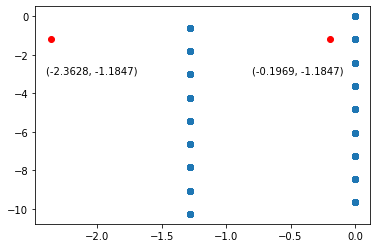

In [34]:
plt.scatter(x_reduced,y_reduced)
plt.scatter(-0.196902041874141, -1.18472727109279,c="red")
plt.scatter(-2.36282450248969, -1.18472727109279,c="red")
plt.text(-0.8, -3, f'({-0.1969}, {-1.1847})', fontsize=10)
plt.text(-2.4, -3, f'({-2.3628}, {-1.1847})', fontsize=10)
plt.savefig("411.jpeg")

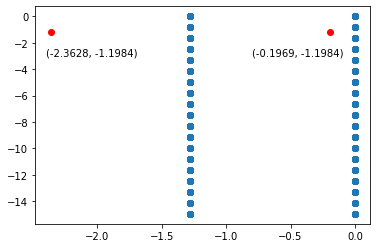

In [28]:
plt.scatter(x_reduced,y_reduced)
plt.scatter(-0.196902041874141, -1.19842132814034,c="red")
plt.scatter(-2.36282450248969, -1.19842132814034,c="red")
plt.text(-0.8, -3, f'({-0.1969}, {-1.1984})', fontsize=10)
plt.text(-2.4, -3, f'({-2.3628}, {-1.1984})', fontsize=10)
plt.savefig("611.jpeg")

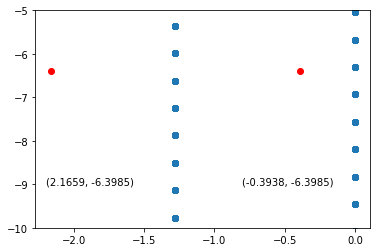

In [61]:
plt.scatter(x_reduced,y_reduced)
plt.scatter(-3.56682094565846e-16, -19.3956319704082,c="red")
plt.scatter(-0.393804083748282, -6.39855900054704,c="red")
plt.scatter(-2.16592246061555, -6.39855900054704,c="red")
# plt.text(-0.5, -20, f'({0}, {-19.3956})', fontsize=10)
plt.text(-2.2, -9, f'({2.1659}, {-6.3985})', fontsize=10)
plt.text(-0.8, -9, f'({-0.3938}, {-6.3985})', fontsize=10)
# plt.ylim([y_reduced.min(),-18])
plt.ylim([-10,-5])
plt.savefig("811_2.jpeg")
# plt.ylim([y_reduced.min(),-18])
# plt.ylim([-10,-5])

(-10.0, -8.0)

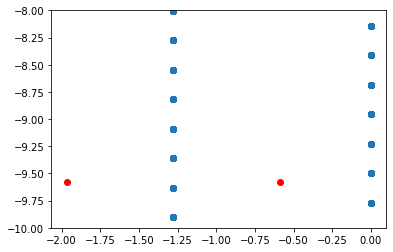

In [72]:
# plt.figure(figsize=(2,25))
plt.scatter(x_reduced,y_reduced)
plt.scatter(-0.590706125622424, -9.57953530819949,c="red")
plt.scatter(-1.96902041874141, -9.57953530819949,c="red")
plt.ylim([-10,-8])

In [106]:
result_df = pd.DataFrame(result_tot)
result_df[0] = result_df[0].astype(float)
result_df[1] = result_df[1].astype(float)
result_df.to_excel("my_model.xlsx")